In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
net = cv2.dnn.readNetFromDarknet('yolov4.cfg','yolov4.weights')

In [3]:
net

<dnn_Net 0x7fe2b2fcbd10>

In [6]:
classes = []
with open('coco.names','r')as f:
    classes = [line.strip() for line in f.readlines()]

In [12]:
my_image = cv2.imread('images/Cats.jpg')

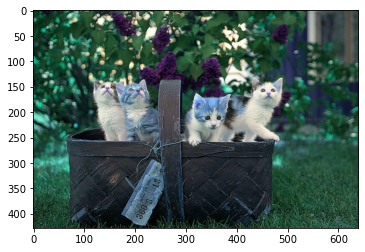

In [13]:
plt.imshow(my_image)

In [28]:
wt, ht, _ = my_image.shape

In [41]:
my_image.shape

(428, 640, 3)

In [17]:
blob = cv2.dnn.blobFromImage(my_image,1/255,(416,416),(0,0,0),swapRB = True, crop = False)

In [18]:
blob.shape

(1, 3, 416, 416)

In [40]:
new_img = np.array(my_image.convert('RGB'))

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [20]:
net.setInput(blob)

In [22]:
last_layer = net.getUnconnectedOutLayersNames()

In [23]:
layer_out = net.forward(last_layer)

In [25]:
layer_out[0].shape

(8112, 85)

In [33]:
boxes = []
confidences = []
class_ids = []

for output in layer_out:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > .6:
            center_x = int(detection[0]*wt)
            center_y = int(detection[1]*ht)
            w = int(detection[2]*wt)
            h = int(detection[3]*ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [34]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences,.5,.4)

In [35]:
indexes

array([[17],
       [20],
       [ 2]], dtype=int32)

In [36]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [38]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(my_image,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_image, label+""+confidence,(x,y+20), font,2,(0,0,0),2)
    

In [39]:
cv2.imshow('Prediction',my_image)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>